In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import os

# Replace the path the actual folder name
os.chdir('/content/drive/MyDrive/DSO 574 Assignment 1')

# Confirm that the files are accessible
os.listdir()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


['AirBnB',
 '574 Assignment 1.gslides',
 'LAcounty.csv',
 'Assignment 1 Codes.ipynb']

In [ ]:
#import package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns

In [ ]:
data=pd.read_csv('AirBnB/Combined Listing Data [Summary].csv')
data.head()

<ipython-input-3-9b8c2b1959c9>:1: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv('AirBnB/Combined Listing Data [Summary].csv')


,Unnamed: 0,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,Scrape File
0,0,3861476,venicelocalliving.com 341,16577861,John,NaN,Venice,33.998202,-118.476196,Entire home/apt,145,1,4,2015-05-08,0.4,10,304.0,los_angeles_2015_05_listings.csv
1,1,6431889,Turquoise Jewel at Venice Beach,18993265,Greg,NaN,Venice,33.985100,-118.469738,Entire home/apt,175,1,0,NaN,NaN,1,76.0,los_angeles_2015_05_listings.csv
2,2,5754633,Terrane Resort - Oceanfront Suite,15241342,Monica,NaN,Rancho Palos Verdes,33.740152,-118.395754,Private room,295,2,0,NaN,NaN,2,310.0,los_angeles_2015_05_listings.csv
3,3,6302541,Hollywood Hot Spot,32776680,Alix,NaN,Hollywood,34.099955,-118.311584,Private room,110,1,0,NaN,NaN,1,362.0,los_angeles_2015_05_listings.csv
4,4,4469657,Main Street Retreat,10658835,Brandon,NaN,Venice,33.997269,-118.478744,Entire home/apt,600,7,0,NaN,NaN,11,328.0,los_angeles_2015_05_listings.csv


In [ ]:
# Assuming 'data' is your DataFrame
data['Scrape_Date'] = data['Scrape File'].str.extract(r'(\d{4}_\d{2})')

# Display the updated dataframe to confirm the extraction
print(data[['Scrape File', 'Scrape_Date']].head())

# Split the 'Scrape_Date' column into 'Year' and 'Month'
data[['Year', 'Month']] = data['Scrape_Date'].str.split('_', expand=True)

# Convert 'Year' and 'Month' to integer type if needed
data['Year'] = data['Year'].astype(int)
data['Month'] = data['Month'].astype(int)

# Display the updated dataframe to confirm the extraction
print(data[['Scrape File', 'Scrape_Date', 'Year', 'Month']].head())


                        Scrape File Scrape_Date
0  los_angeles_2015_05_listings.csv     2015_05
1  los_angeles_2015_05_listings.csv     2015_05
2  los_angeles_2015_05_listings.csv     2015_05
3  los_angeles_2015_05_listings.csv     2015_05
4  los_angeles_2015_05_listings.csv     2015_05
                        Scrape File Scrape_Date  Year  Month
0  los_angeles_2015_05_listings.csv     2015_05  2015      5
1  los_angeles_2015_05_listings.csv     2015_05  2015      5
2  los_angeles_2015_05_listings.csv     2015_05  2015      5
3  los_angeles_2015_05_listings.csv     2015_05  2015      5
4  los_angeles_2015_05_listings.csv     2015_05  2015      5


In [ ]:
data.shape

(1633610, 21)

In [ ]:
data.columns

Index(['Unnamed: 0', 'id', 'name', 'host_id', 'host_name',
       'neighbourhood_group', 'neighbourhood', 'latitude', 'longitude',
       'room_type', 'price', 'minimum_nights', 'number_of_reviews',
       'last_review', 'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'Scrape File', 'Scrape_Date', 'Year', 'Month'],
      dtype='object')

In [ ]:
data.drop(columns=['Unnamed: 0'],inplace=True)

In [ ]:
data['neighbourhood_group'].value_counts()

,count
neighbourhood_group,
City of Los Angeles,859933
Other Cities,405412
Unincorporated Areas,85349


In [ ]:
data['neighbourhood'].value_counts()

,count
neighbourhood,
Venice,99238
Hollywood,97037
Long Beach,62710
Downtown,58042
Santa Monica,47604
...,...
Whittier Narrows,5
Elizabeth Lake,4
Walnut Park,2


In [ ]:
data.isnull().sum()

,0
id,0
name,162
host_id,0
host_name,6484
neighbourhood_group,282916
neighbourhood,0
latitude,0
longitude,0
room_type,0
price,0


In [ ]:
data_filtered = data[['Year', 'Month', 'name', 'neighbourhood_group', 'neighbourhood', 'room_type', 'price', 'minimum_nights', 'number_of_reviews', 'availability_365']]

In [ ]:
# prompt: drop the data if Year, Month and Day is null

#data_filtered = data_filtered.dropna(subset=['Year', 'Month', 'Day'])

In [ ]:
data_filtered.reset_index()
data_filtered.head(10)

,Year,Month,name,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,availability_365
0,2015,5,venicelocalliving.com 341,NaN,Venice,Entire home/apt,145,1,4,304.0
1,2015,5,Turquoise Jewel at Venice Beach,NaN,Venice,Entire home/apt,175,1,0,76.0
2,2015,5,Terrane Resort - Oceanfront Suite,NaN,Rancho Palos Verdes,Private room,295,2,0,310.0
3,2015,5,Hollywood Hot Spot,NaN,Hollywood,Private room,110,1,0,362.0
4,2015,5,Main Street Retreat,NaN,Venice,Entire home/apt,600,7,0,328.0
5,2015,5,Stylish Bungalow House-Melrose Area,NaN,Hollywood,Entire home/apt,95,1,11,293.0
6,2015,5,Private BD/3 BD Cali Casual Home,NaN,West Hollywood,Private room,90,1,2,365.0
7,2015,5,Walk to LACMA & the Grove,NaN,Beverly Grove,Entire home/apt,274,3,3,307.0
8,2015,5,PRIME LOCATION IN N.HOLLYWOOD- 2 BD,NaN,North Hollywood,Entire home/apt,99,2,10,26.0
9,2015,5,Venice Villetta,NaN,Venice,Entire home/apt,159,2,57,308.0


In [ ]:
data_focus= data_filtered[(data_filtered['Year'] == 2018)|(data_filtered['Year'] == 2019)|(data_filtered['Year'] == 2020)|(data_filtered['Year'] == 2021)]
data_focus.head()

,Year,Month,name,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,availability_365
244104,2018,3,Amazing bright elegant condo park front *UPGRA...,NaN,Culver City,Entire home/apt,122,7,2,344.0
244105,2018,3,Family perfect;Pool;Near Studios!,NaN,Burbank,Entire home/apt,168,1,1,0.0
244106,2018,3,deleted,NaN,Del Rey,Shared room,85,1,0,365.0
244107,2018,3,Zen Life at the Beach,NaN,Santa Monica,Private room,155,1,17,313.0
244108,2018,3,*Upscale Professional Home with Beautiful Studio*,NaN,Bellflower,Entire home/apt,80,2,0,0.0


Whole LA County

1. Price changing (year, month comparison)

LA city vs. Others
1. Any certain area effect by covid-19 most
2. Numbers of Reviews
3. Room types, Avaliability, Minimum_nights


----------------



# LA County

In [ ]:
data_focus.head()
data_focus.reset_index()

,index,Year,Month,name,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,availability_365
0,244104,2018,3,Amazing bright elegant condo park front *UPGRA...,NaN,Culver City,Entire home/apt,122,7,2,344.0
1,244105,2018,3,Family perfect;Pool;Near Studios!,NaN,Burbank,Entire home/apt,168,1,1,0.0
2,244106,2018,3,deleted,NaN,Del Rey,Shared room,85,1,0,365.0
3,244107,2018,3,Zen Life at the Beach,NaN,Santa Monica,Private room,155,1,17,313.0
4,244108,2018,3,*Upscale Professional Home with Beautiful Studio*,NaN,Bellflower,Entire home/apt,80,2,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1389501,1633605,2021,1,Luxury Suite Downtown LA,City of Los Angeles,Downtown,Private room,150,30,1,256.0
1389502,1633606,2021,1,1B1B private entrance big yard near supermarket,Other Cities,Arcadia,Private room,45,1,0,0.0
1389503,1633607,2021,1,"Centinela ONE, 2bd apartment",City of Los Angeles,Mar Vista,Entire home/apt,72,30,0,28.0
1389504,1633608,2021,1,Specious House with basketball court in the yard,Other Cities,Arcadia,Entire home/apt,120,3,0,0.0


In [ ]:
data_focus.loc[data_focus['Year'] == 2018].isnull().sum()

,0
Year,0
Month,0
name,78
neighbourhood_group,38812
neighbourhood,0
room_type,0
price,0
minimum_nights,0
number_of_reviews,0
availability_365,0


In [ ]:
LAcounty = data_focus.groupby(['Year','Month'])[['price', 'minimum_nights', 'number_of_reviews', 'availability_365']].mean()
LAcounty.head()

price  minimum_nights  number_of_reviews  availability_365
Year Month                                                                 
2018 3      193.714830        3.650546          24.046120        174.026461
     4      196.846755        3.684888          24.683017        172.269070
     5      197.170099        3.793159          25.132578        168.855894
     6      196.990462        3.860308          25.753470        167.494979
     7      195.014912        3.874935          26.271234        168.348963

In [ ]:
# prompt: export LAcounty to csv

LAcounty.to_csv('LAcounty.csv')


In [ ]:
LAcounty = LAcounty.reset_index()
LAcounty.head()

,Year,Month,price,minimum_nights,number_of_reviews,availability_365
0,2018,3,193.714830,3.650546,24.046120,174.026461
1,2018,4,196.846755,3.684888,24.683017,172.269070
2,2018,5,197.170099,3.793159,25.132578,168.855894
3,2018,6,196.990462,3.860308,25.753470,167.494979
4,2018,7,195.014912,3.874935,26.271234,168.348963


#### Price Changing after Covid

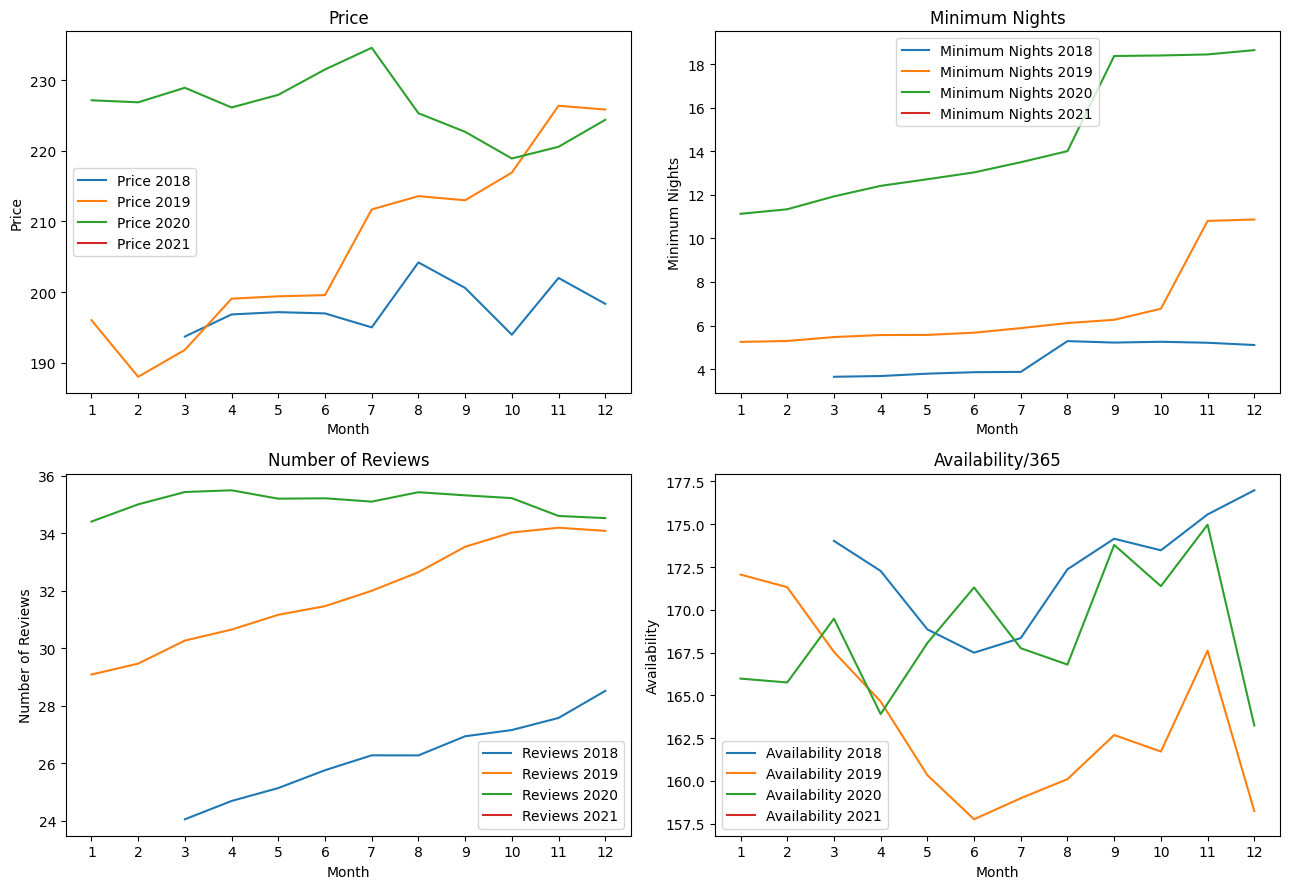

In [ ]:
import matplotlib.pyplot as plt

# Plotting with subplots for each metric
fig, axes = plt.subplots(2, 2, figsize=(13, 9))

# Loop through each year and plot for each metric on different subplots
for year in LAcounty['Year'].unique():
    LAcounty_year = LAcounty[LAcounty['Year'] == year]

    # Plot Price
    axes[0, 0].plot(LAcounty_year['Month'], LAcounty_year['price'], label=f"Price {year}")

    # Plot Minimum Nights
    axes[0, 1].plot(LAcounty_year['Month'], LAcounty_year['minimum_nights'], label=f"Minimum Nights {year}")

    # Plot Reviews
    axes[1, 0].plot(LAcounty_year['Month'], LAcounty_year['number_of_reviews'], label=f"Reviews {year}")

    # Plot Availability
    axes[1, 1].plot(LAcounty_year['Month'], LAcounty_year['availability_365'], label=f"Availability {year}")

# Set titles and labels
axes[0, 0].set_title('Price')
axes[0, 0].set_xlabel('Month')
axes[0, 0].set_ylabel('Price')
axes[0, 0].legend()
axes[0, 0].grid(False)
axes[0, 0].set_xticks(range(1, 13))

axes[0, 1].set_title('Minimum Nights')
axes[0, 1].set_xlabel('Month')
axes[0, 1].set_ylabel('Minimum Nights')
axes[0, 1].legend()
axes[0, 1].grid(False)
axes[0, 1].set_xticks(range(1, 13))

axes[1, 0].set_title('Number of Reviews')
axes[1, 0].set_xlabel('Month')
axes[1, 0].set_ylabel('Number of Reviews')
axes[1, 0].legend()
axes[1, 0].grid(False)
axes[1, 0].set_xticks(range(1, 13))

axes[1, 1].set_title('Availability/365')
axes[1, 1].set_xlabel('Month')
axes[1, 1].set_ylabel('Availability')
axes[1, 1].legend()
axes[1, 1].grid(False)
axes[1, 1].set_xticks(range(1, 13))

plt.tight_layout()
plt.show()

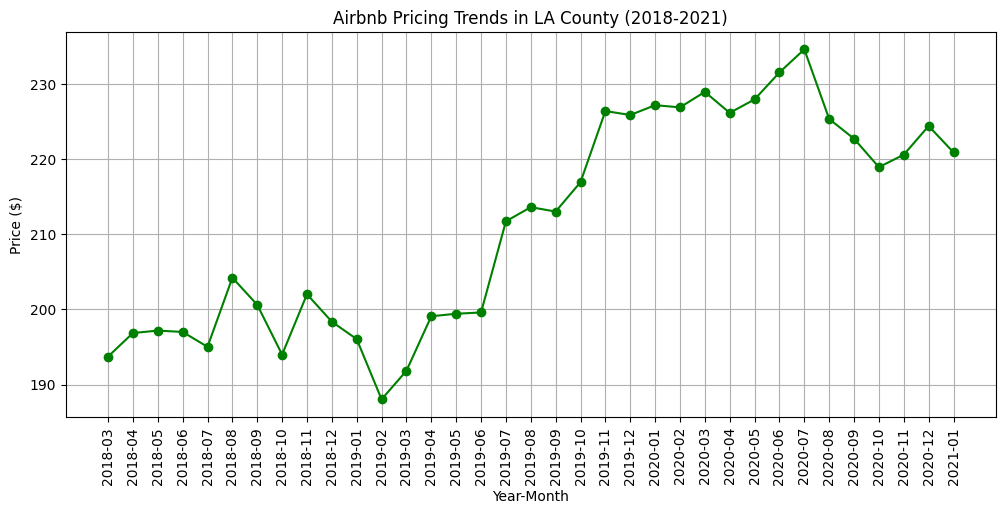

In [ ]:
# Correcting the plot for pricing changes across 2018-2021 with actual dataframe and column names
# Creating a year-month combination for the x-axis
LAcounty['Year-Month'] = LAcounty['Year'].astype(str) + '-' + LAcounty['Month'].astype(str).str.zfill(2)

# Plotting the price trends
plt.figure(figsize=(12, 5))
plt.plot(LAcounty['Year-Month'], LAcounty['price'], marker='o', linestyle='-', color='green')
plt.title('Airbnb Pricing Trends in LA County (2018-2021)')
plt.xlabel('Year-Month')
plt.ylabel('Price ($)')
plt.xticks(rotation=90)  # Rotating x-axis labels for better visibility
plt.grid(True)
plt.show()


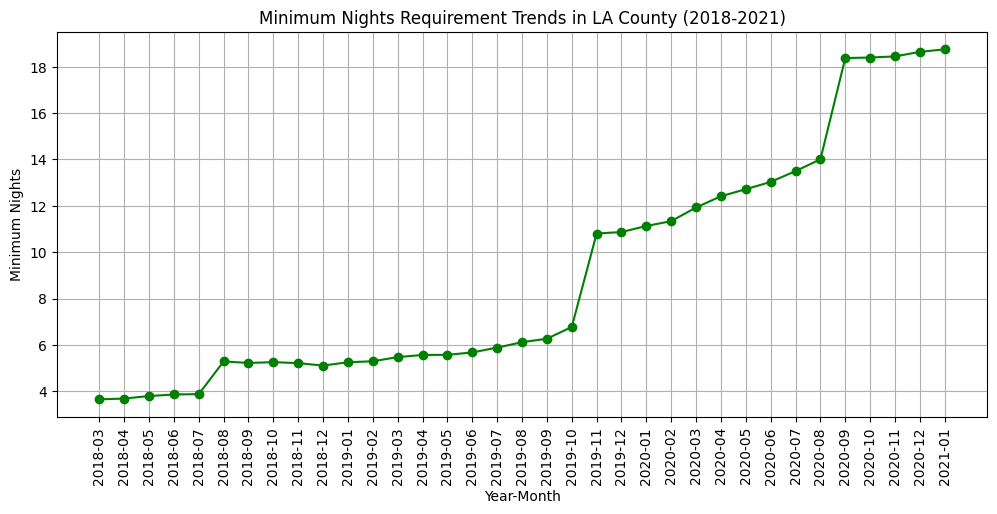

In [ ]:

# Plotting the price trends
plt.figure(figsize=(12,5))
plt.plot(LAcounty['Year-Month'], LAcounty['minimum_nights'], marker='o', linestyle='-', color='green')
plt.title('Minimum Nights Requirement Trends in LA County (2018-2021)')
plt.xlabel('Year-Month')
plt.ylabel('Minimum Nights')
plt.xticks(rotation=90)  # Rotating x-axis labels for better visibility
plt.grid(True)
plt.show()

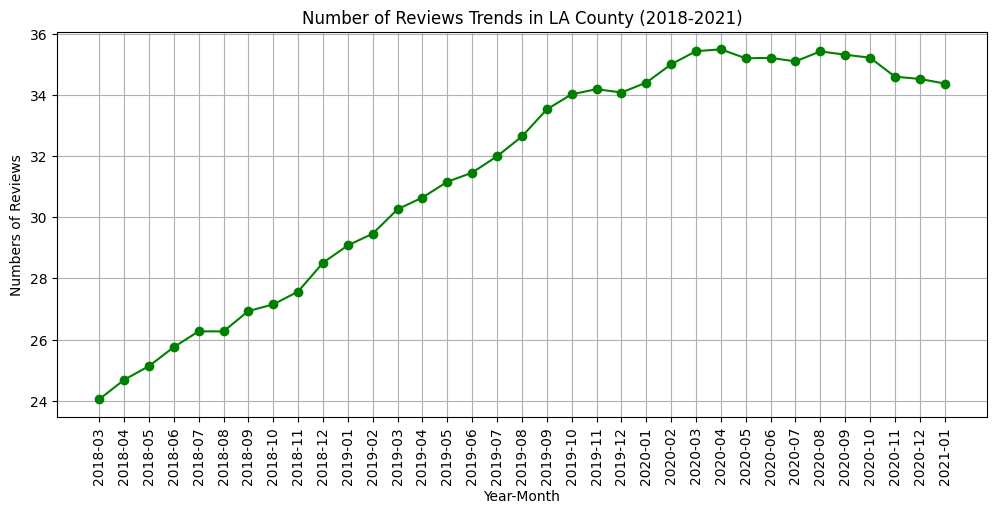

In [ ]:
# Plotting the price trends
plt.figure(figsize=(12,5))
plt.plot(LAcounty['Year-Month'], LAcounty['number_of_reviews'], marker='o', linestyle='-', color='green')
plt.title('Number of Reviews Trends in LA County (2018-2021)')
plt.xlabel('Year-Month')
plt.ylabel('Numbers of Reviews')
plt.xticks(rotation=90)  # Rotating x-axis labels for better visibility
plt.grid(True)
plt.show()

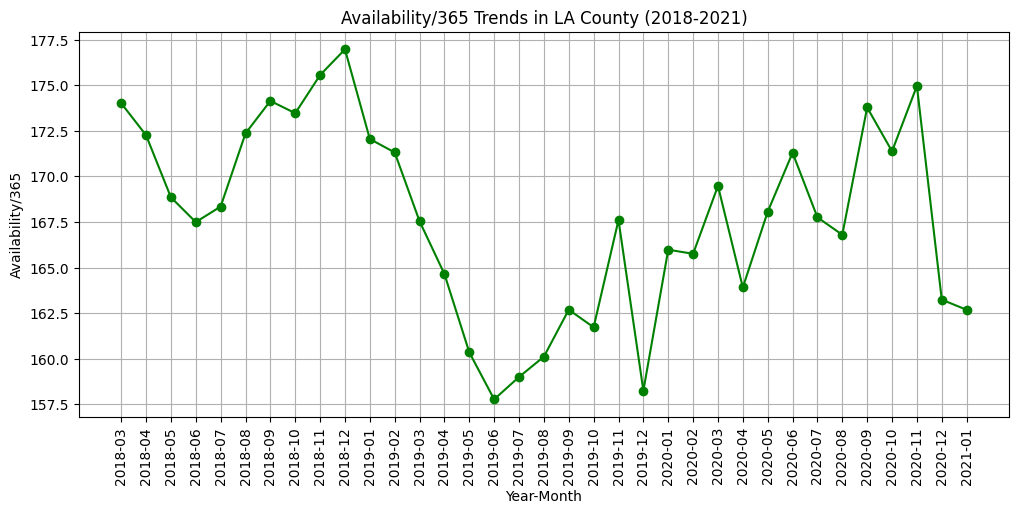

In [ ]:
# Plotting the price trends
plt.figure(figsize=(12,5))
plt.plot(LAcounty['Year-Month'], LAcounty['availability_365'], marker='o', linestyle='-', color='green')
plt.title('Availability/365 Trends in LA County (2018-2021)')
plt.xlabel('Year-Month')
plt.ylabel('Availability/365')
plt.xticks(rotation=90)  # Rotating x-axis labels for better visibility
plt.grid(True)
plt.show()

$ \text{Price Trends}$

2018 - 2019:  Airbnb prices remained relatively stable, showing slight fluctuations. Typically, prices increased during the summer months (June to August), likely due to higher demand during the peak travel season.

2020 (Pandemic): In early 2020, with the outbreak of the COVID-19 pandemic, Airbnb prices experienced a significant decline. Particularly from March to May 2020, prices dropped sharply, reflecting the substantial impact of global travel restrictions and lockdown measures on the short-term rental market. As the pandemic continued, prices remained low throughout 2020, with a slight recovery during the summer, but the overall trend was downward.
* Add-ons: The price dropped in mid to late 2020, possibly due to reduced tourism and increased supply as property owners struggled to fill rentals

2021 (Recovery): Entering 2021, with the rollout of vaccines and the gradual lifting of travel restrictions, Airbnb prices began to show signs of recovery. Although prices were still below pre-pandemic levels, the gradual upward trend indicated that the market was slowly recovering.

$ \text{Numbers of Reviews Trends}$

2018:

Upward Trend: The number of reviews in 2018 shows a general upward trend, indicating increasing activity in the Airbnb market.  This growth suggests that more users were opting for Airbnb as a preferred accommodation option, and there was likely an increase in the number of listings available.  The moderately ascending trend reflects a stable and growing acceptance of short-term rentals in LA County, as more travelers and hosts embraced the platform.

2019:

Steeper Growth: In 2019, the upward trend in the number of reviews continues, possibly at an even steeper rate than in 2018.  This suggests not only an increase in the popularity of Airbnb but also an expansion in the overall market penetration.  The consistent rise through 2019 indicates strong market health, high demand, and effective marketing strategies by hosts.  It's likely that Airbnb was becoming more integrated into the standard travel plans for visitors to LA County, solidifying its position as a mainstream accommodation option.

2020:

Sharp Decline: The sharp decline in the number of reviews in 2020 is one of the most direct reflections of the pandemic's impact.  As travel restrictions were implemented and global uncertainty about health and safety grew, fewer travelers chose or were able to stay in Airbnb accommodations.  The decline in reviews correlates closely with periods of intense COVID-19 outbreaks and corresponding public health responses.  This drop reflects a significant reduction in booking volume, which is directly tied to the decreased travel activity and economic downturn caused by the pandemic.
* Add-ons: (reviews should be peaked??) The demand for Airbnb remained strong.The higher review count in 2020 may be due to fewer total listings—-active listings received more guests and thus more reviews suggesting that although fewer listings were available, demand remained strong.

2021 (based on visual trends and expected data):

Gradual Recovery: Although specific 2021 data was not detailed previously, if the trend of recovery hinted at in pricing and availability discussions is consistent, we might expect a gradual recovery in the number of reviews as well.  This would be aligned with easing restrictions, increasing traveler confidence, and a general adaptation to new travel norms.  Travelers may be opting for longer stays or choosing destinations based on different criteria such as safety and sanitation standards.  

$ \text{Minimum Nights Trends} $

2018: Minimum Nights are likely to be relatively stable or slightly volatile, reflecting steady demand for short-term rentals. Landlords may have fewer restrictions to attract more short-term guests.

2019: With the popularity of Airbnb, the Minimum Nights may have increased, especially during the peak travel season. Hosts may start setting longer minimum stay days to manage bookings and reduce frequent guest turnover.

2020: Minimum Nights may increase significantly during an epidemic. Due to travel restrictions and declining demand, landlords may extend the minimum stay days to attract long-term guests (such as remote workers or those seeking isolated accommodation), thereby reducing vacancy rates.
* Add-ons: The increase in minimum nights and increased long-term rental listings resulted from Airbnb hosts pivoting to accommodate local renters rather than travelers.

2021: As the market gradually recovers, the Minimum Nights may start to fall back, but they are likely to remain above pre-pandemic levels. Landlords may be balancing flexibility with long-term accommodation to accommodate a gradual return to short-term travel needs.

$\text{Availablity Trends}$

Availability refers to the number of days in a year that Airbnb listings are available.

2018: Availability is likely to be relatively stable, reflecting steady demand for short-term rentals. Landlords usually have higher availability to attract more guests.

2019: Availability may have declined as Airbnb grew in popularity and demand. More bookings mean fewer days of availability, especially during the peak travel season.

2020: Availability is likely to increase significantly during the pandemic. Due to travel restrictions and falling demand, many listings remain empty for long periods of time, leading to a significant rise in the number of available days. Landlords may have trouble finding guests, especially at the peak of the pandemic.
* Add-ons: Availability dropped significantly in early months (coinciding with COVID lockdowns) but later recovered partially. In early 2020, many Airbnb listings were taken off the market due to travel restrictions.
Some hosts converted properties into long-term rentals, reducing the total number of Airbnb listings.

2021: Availability may begin to decline as markets gradually recover, but it is likely to remain above pre-pandemic levels. As travel demand picks up, the number of bookings is up and the number of available days is down, but it may not yet be fully back to pre-pandemic levels.

* $\text{Add-ons: Overall COVID-19 Impact on Airbnb Market in LA County}$

Higher Prices: Fewer listings + travel uncertainty → increased Airbnb rates in 2020-2021.

Longer Minimum Stays: Hosts shifted to long-term rental models, requiring higher minimum nights.

Fewer Listings, Higher Demand for Active Ones: Many hosts left the market, causing the remaining ones to receive more bookings and reviews.

Reduced Availability: Airbnb supply shrank significantly, but slowly recovered post-2020.

--------------------

# $ \text{Analysis by Neighbourhood} $

In [ ]:
data_focus.head()

,Year,Month,name,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,availability_365
244104,2018,3,Amazing bright elegant condo park front *UPGRA...,NaN,Culver City,Entire home/apt,122,7,2,344.0
244105,2018,3,Family perfect;Pool;Near Studios!,NaN,Burbank,Entire home/apt,168,1,1,0.0
244106,2018,3,deleted,NaN,Del Rey,Shared room,85,1,0,365.0
244107,2018,3,Zen Life at the Beach,NaN,Santa Monica,Private room,155,1,17,313.0
244108,2018,3,*Upscale Professional Home with Beautiful Studio*,NaN,Bellflower,Entire home/apt,80,2,0,0.0


In [ ]:
data_focus['neighbourhood_group'].value_counts()

,count
neighbourhood_group,
City of Los Angeles,859933
Other Cities,405412
Unincorporated Areas,85349


In [ ]:
cityofla = data_focus.loc[data_focus['neighbourhood_group']== 'City of Los Angeles']
cityofla['neighbourhood'].unique()


array(['Del Rey', 'Hollywood Hills West', 'Studio City', 'Woodland Hills',
       'Hollywood', 'Mid-City', 'Atwater Village', 'Downtown', 'Venice',
       'Hollywood Hills', 'Mid-Wilshire', 'Elysian Valley',
       'Beverly Grove', 'Valley Village', 'Sherman Oaks', 'Silver Lake',
       'Pico-Robertson', 'Highland Park', 'Mount Washington',
       'Glassell Park', 'West Los Angeles', 'East Hollywood',
       'Pacific Palisades', 'Los Feliz', 'Fairfax', 'Chinatown',
       'Mar Vista', 'Eagle Rock', 'Jefferson Park', 'Van Nuys', 'Encino',
       'Granada Hills', 'Harvard Heights', 'Carthay', 'Elysian Park',
       'Beverlywood', 'Cheviot Hills', 'North Hills', 'Tujunga',
       'Echo Park', 'Westchester', 'Westlake', 'Bel-Air', 'El Sereno',
       'Valley Glen', 'Sawtelle', 'Shadow Hills', 'Palms',
       'North Hollywood', 'Sun Valley', 'Koreatown', 'Beverly Crest',
       'San Pedro', 'Century City', 'Sylmar', 'Baldwin Hills/Crenshaw',
       'Reseda', 'Arlington Heights', 'Watts', 'B

In [ ]:
othercities = data_focus.loc[data_focus['neighbourhood_group']== 'Other Cities']
othercities['neighbourhood'].unique()


array(['Culver City', 'Burbank', 'Santa Monica', 'Bellflower',
       'Beverly Hills', 'Long Beach', 'Gardena', 'Redondo Beach',
       'Glendale', 'West Hollywood', 'Rosemead', 'Malibu', 'Torrance',
       'Lynwood', 'Lakewood', 'Pasadena', 'Carson', 'La Mirada',
       'Calabasas', 'Rancho Palos Verdes', 'Manhattan Beach',
       'Pico Rivera', 'Hermosa Beach', 'El Segundo', 'Inglewood',
       'Covina', 'South Pasadena', 'La Canada Flintridge',
       'Monterey Park', 'Westlake Village', 'Walnut', 'Whittier',
       'West Covina', 'Alhambra', 'Palmdale', 'Pomona', 'Baldwin Park',
       'Agoura Hills', 'Monrovia', 'Montebello', 'Rolling Hills Estates',
       'San Gabriel', 'Lomita', 'San Fernando', 'San Dimas', 'Hawthorne',
       'Signal Hill', 'Santa Clarita', 'Arcadia', 'Rolling Hills',
       'Diamond Bar', 'Claremont', 'Lawndale', 'Downey', 'Lancaster',
       'Avalon', 'El Monte', 'Palos Verdes Estates', 'Sierra Madre',
       'Bell', 'Azusa', 'Huntington Park', 'Temple City'

In [ ]:
unicorporated = data_focus.loc[data_focus['neighbourhood_group']== 'Unincorporated Areas']
unicorporated['neighbourhood'].unique()

array(['Altadena', 'View Park-Windsor Hills',
       'Unincorporated Santa Monica Mountains', 'Topanga',
       'East San Gabriel', 'Agua Dulce', 'Rowland Heights',
       'Northeast Antelope Valley', 'East Pasadena', 'South San Gabriel',
       'Ladera Heights', 'Lopez/Kagel Canyons', 'Marina del Rey',
       'Quartz Hill', 'Hacienda Heights', 'La Crescenta-Montrose',
       'West Carson', 'Universal City', 'Veterans Administration',
       'North Whittier', 'South Whittier', 'Athens', 'Val Verde',
       'Mayflower Village', 'San Pasqual',
       'Unincorporated Santa Susana Mountains', 'Willowbrook',
       'Castaic Canyons', 'Del Aire', 'East Los Angeles', 'Alondra Park',
       'Stevenson Ranch', 'Angeles Crest', 'Westmont', 'Green Valley',
       'South San Jose Hills', 'Ridge Route', 'Citrus',
       'Southeast Antelope Valley', 'Sun Village', 'Florence-Firestone',
       'East Compton', 'Northwest Palmdale', 'Valinda', 'Charter Oak',
       'Rancho Dominguez', 'West Puente Vall

In [ ]:
data_focus[['neighbourhood','neighbourhood_group']].value_counts().head(30)

,,count
neighbourhood,neighbourhood_group,
Hollywood,City of Los Angeles,78631
Venice,City of Los Angeles,77713
Long Beach,Other Cities,53943
Downtown,City of Los Angeles,49504
Santa Monica,Other Cities,37022
Hollywood Hills,City of Los Angeles,31923
Westlake,City of Los Angeles,27015
West Hollywood,Other Cities,26824
Mid-Wilshire,City of Los Angeles,25523


In [ ]:
# prompt: filtered the dataset only focus on Hollywood, Venice, Long Beach, Santa Monica

# Assuming 'data_focus' is your DataFrame
filtered_data = data_focus[data_focus['neighbourhood'].isin(['Venice', 'Santa Monica', 'Rowland Heights'])].reset_index()

# Display the filtered DataFrame
filtered_data.head()


,index,Year,Month,name,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,availability_365
0,244107,2018,3,Zen Life at the Beach,NaN,Santa Monica,Private room,155,1,17,313.0
1,244120,2018,3,Cozy Guest House on Venice Walk St.,NaN,Venice,Entire home/apt,121,2,349,360.0
2,244122,2018,3,"Bright Apt, walk to Venice Beach",NaN,Venice,Private room,95,2,29,365.0
3,244125,2018,3,Le petit bungalow + bikes in VB,NaN,Venice,Entire home/apt,95,14,31,58.0
4,244129,2018,3,ARCHITECTURAL GEM; CANALS & BEACH,NaN,Venice,Entire home/apt,425,1,28,332.0


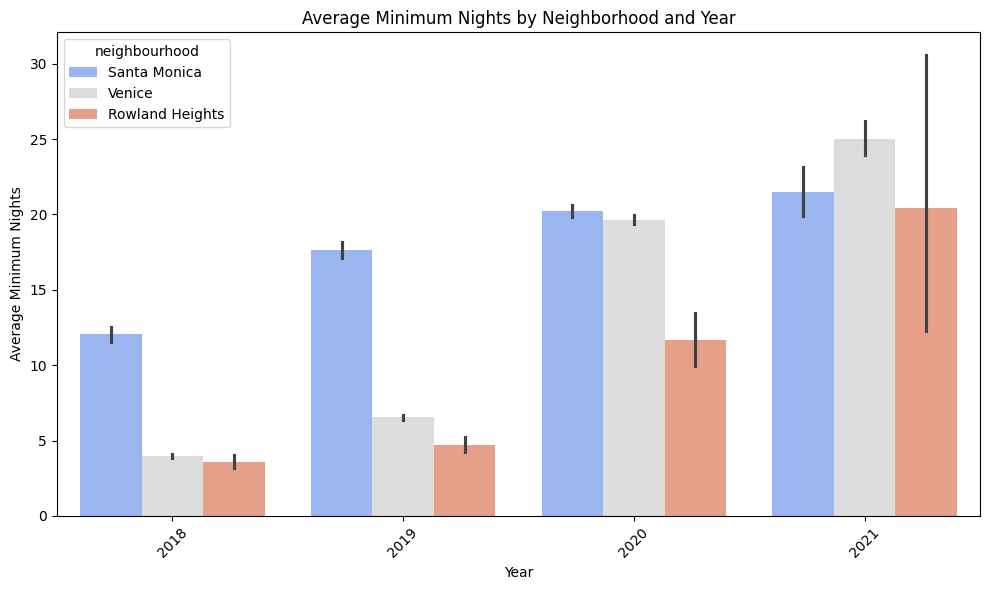

In [ ]:
# prompt: barplots the price of  'Hollywood', 'Venice', 'Long Beach', 'Santa Monica' with year trends

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'filtered_data' is your DataFrame with the specified neighborhoods
# and you have already performed the necessary filtering steps.

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Year', y='minimum_nights', hue='neighbourhood', data=filtered_data, palette="coolwarm")
plt.title('Average Minimum Nights by Neighborhood and Year')
plt.xlabel('Year')
plt.ylabel('Average Minimum Nights')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()


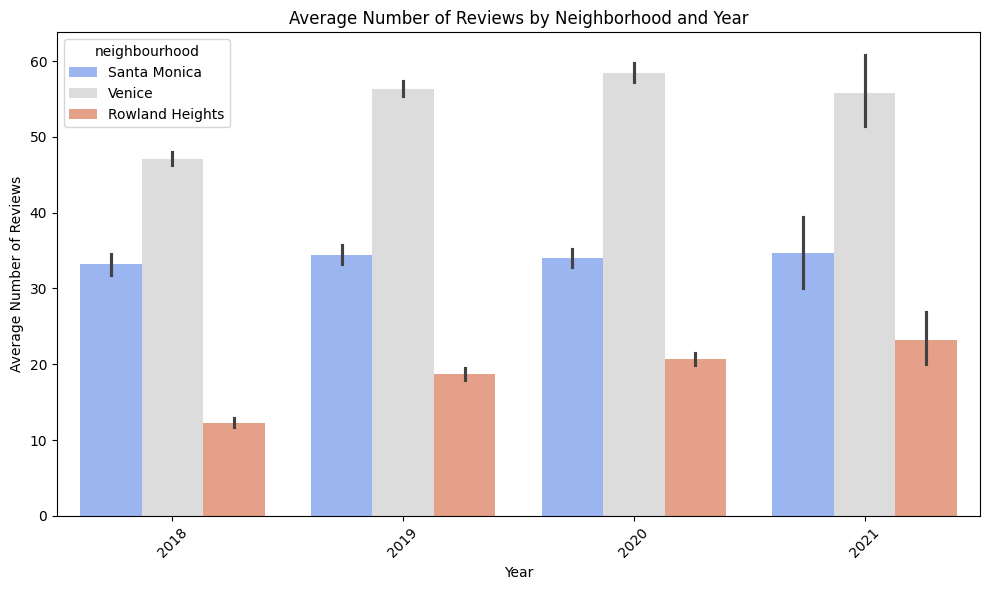

In [ ]:
# prompt: barplots the  number of reviews of  'Venice', 'Santa Monica'  and ' Rowland Heights' with year trends

# Assuming 'filtered_data' is your DataFrame with the specified neighborhoods
# and you have already performed the necessary filtering steps.

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Year', y='number_of_reviews', hue='neighbourhood', data=filtered_data, palette="coolwarm")
plt.title('Average Number of Reviews by Neighborhood and Year')
plt.xlabel('Year')
plt.ylabel('Average Number of Reviews')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()


In [ ]:
filtered_data2 = filtered_data.groupby(['Year','neighbourhood','room_type'])['room_type'].count()
filtered_data2

Year  neighbourhood    room_type      
2018  Rowland Heights  Entire home/apt     1363
                       Private room        3189
                       Shared room          161
      Santa Monica     Entire home/apt     5870
                       Private room        2857
                       Shared room          163
      Venice           Entire home/apt    20848
                       Private room        5008
                       Shared room          582
2019  Rowland Heights  Entire home/apt     1793
                       Private room        4255
                       Shared room          191
      Santa Monica     Entire home/apt     9574
                       Hotel room            33
                       Private room        3528
                       Shared room          259
      Venice           Entire home/apt    24886
                       Hotel room            44
                       Private room        5248
                       Shared room          721
2020  Rowland Heights  Entire home/apt     2013
                       Private room        4508
                       Shared room          147
      Santa Monica     Entire home/apt    10907
                       Hotel room            81
                       Private room        3474
                       Shared room          166
      Venice           Entire home/apt    17508
                       Hotel room            82
                       Private room        3363
                       Shared room          285
2021  Rowland Heights  Entire home/apt      171
                       Private room         315
                       Shared room           11
      Santa Monica     Entire home/apt      874
                       Hotel room             7
                       Private room         280
                       Shared room            9
      Venice           Entire home/apt     1353
                       Hotel room             7
                       Private room         217
                       Shared room           16
Name: room_type, dtype: int64

In [ ]:
# prompt: change the filtered _data2 column name room_type to counts

filtered_data2 = filtered_data.groupby(['Year','neighbourhood','room_type'])['room_type'].count().rename('counts')
filtered_data2 = filtered_data2.reset_index()


<ipython-input-36-dc26e773d162>:11: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  ax = sns.barplot(x='Year', y='counts', hue='room_type', data=temp_df, palette=colors)


<Figure size 800x600 with 0 Axes>

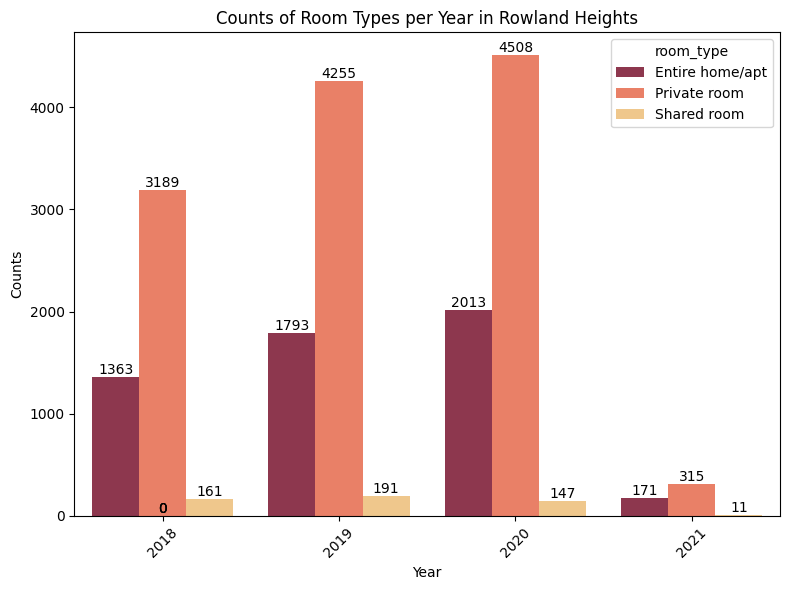

<ipython-input-36-dc26e773d162>:11: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  ax = sns.barplot(x='Year', y='counts', hue='room_type', data=temp_df, palette=colors)


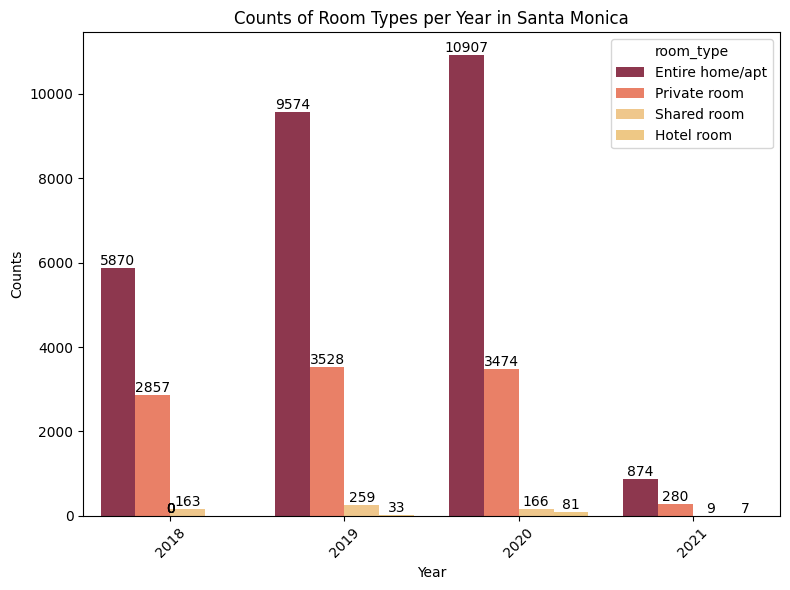

<ipython-input-36-dc26e773d162>:11: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  ax = sns.barplot(x='Year', y='counts', hue='room_type', data=temp_df, palette=colors)


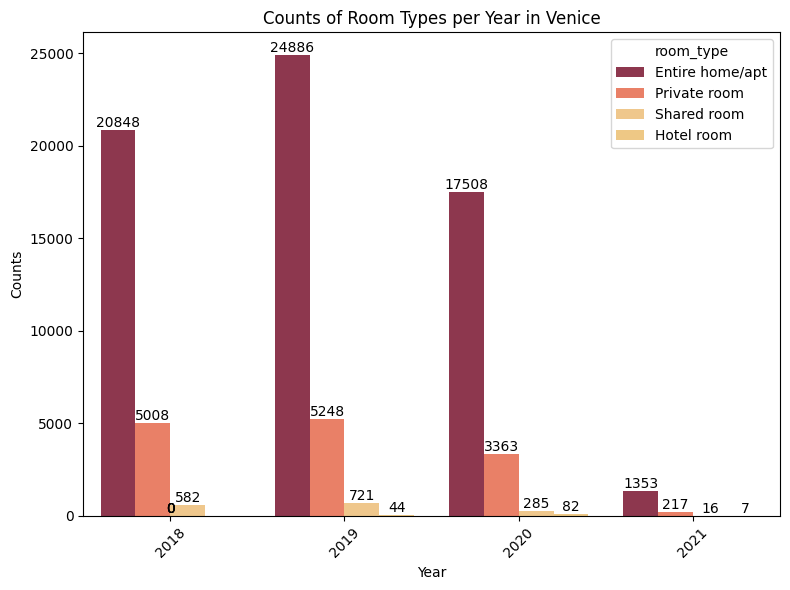

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
colors = ['#9b2948', '#ff7251','#ffca7b','#ffcd74','#ffedbf']

for neighborhood in filtered_data2['neighbourhood'].unique():
    temp_df = filtered_data2[filtered_data2['neighbourhood'] == neighborhood]

    plt.figure(figsize=(8,6))
    ax = sns.barplot(x='Year', y='counts', hue='room_type', data=temp_df, palette=colors)

    # Add value labels on each bar
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='bottom', fontsize=10, color='black')

    plt.title(f'Counts of Room Types per Year in {neighborhood}')
    plt.xlabel('Year')
    plt.ylabel('Counts')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


$\text{City of Los Angeles}$

Los Angeles, a major hub for tourism and business, saw significant price volatility during the pandemic. Early 2020 witnessed a sharp decrease in prices, a reflection of the collapse in travel demand triggered by the onset of COVID-19. Although there was a partial recovery in 2021, prices have not rebounded to pre-pandemic levels. The number of reviews plummeted in 2020 due to reduced bookings and a standstill in travel activities, slowly increasing in 2021, suggesting a gradual market recovery that is still not back to normal.

Furthermore, the minimum number of nights required by hosts significantly increased in 2020. This change indicates a strategic shift by hosts preferring longer-term stays to reduce turnover and minimize the risk of infection. While there was some relaxation in this policy in 2021, the requirements remained stricter than before the pandemic.

$ \text{Other Cities}$

Other cities within LA County experienced relatively minor price fluctuations, indicating more stable market conditions. Prices in these areas recovered steadily, suggesting that they might have adapted more quickly to the new travel demands post-pandemic. The drop in review numbers was less severe compared to Los Angeles, with a quicker recovery hinting at stronger market resilience.

Additionally, there was an increase in the minimum number of nights required, although it was less pronounced than in Los Angeles, reflecting a balance between maintaining booking flexibility and enhancing safety protocols.

$ \text{Unincorporated Areas} $

Unincorporated areas demonstrated the most stability in pricing with minimal fluctuations, pointing to lower sensitivity to market changes and fewer impacts from travel restrictions. Reviews in these areas began to decline earlier during the pandemic and showed a slower recovery, suggesting that the impact of the pandemic was felt sooner but with prolonged effects. The increase in the minimum number of nights was the most modest among all areas, suggesting a reliance on long-term residents or a focus on the local market, which likely contributed to greater stability.

$ \text{General Insights} $

Across all regions, the pandemic brought about significant shifts in the Airbnb market. Urban areas like Los Angeles experienced the most volatility, while other cities and unincorporated areas showed greater resilience and stability. The overall increase in minimum stay requirements across regions reflects a widespread response among hosts to mitigate health risks and adapt to changing traveler behaviors. This adaptation, alongside varying degrees of market recovery, highlights the diverse impacts of the pandemic on different parts of LA County. The trends indicate not only the challenges posed by the pandemic but also the potential for ongoing adjustments as the market continues to stabilize and adapt to new realities of travel.










$ \text{Number of Reviews Trends by Room Type}$

City of Los Angeles:
* Entire Home/Apt:
 * A steady increase from 2018 to 2020, indicating consistent demand
 * A slight decline in 2021, possibly due to regulatory restrictions or shifting traveler preferences post-pandemic.
* Hotel Room:
 * Sharp increase from 2018 to 2020, peaking in 2020.
 * Decline in 2021, likely due to reduced business travel and travelers preferring private, isolated accommodations instead of shared hotel spaces.
* Private Room:
 * Consistently increasing but flattens post-2020.
 * May indicate stable demand for more affordable options, but not a significant boom.
* Shared Room:
 * Minimal change, remaining at a low level throughout all years.
 * COVID-19 likely discouraged shared accommodations due to health concerns.

Overall impacts:

In 2020, there was an increase in reviews for entire homes and hotel rooms, suggesting that some travelers still booked stays.
In 2021, there was a decline, which may indicate lingering effects of travel restrictions, reduced tourism, and shifts in accommodation preferences.


Other Cities:
* Entire Home/Apt:
 * Gradual increase from 2018 to 2021, indicating stable or rising demand
* Hotel Room:
 * Sharp increase from 2018 to 2020, peaking in 2020.
 * Decline in 2021, likely due to reduced business travel and travelers preferring private, isolated accommodations instead of shared hotel spaces.
* Private Room:
 * Consistently increasing but flattens post-2020.
 * May indicate stable demand for more affordable options, but not a significant boom.
* Shared Room:
 * Minimal change, remaining at a low level throughout all years.
 * COVID-19 likely discouraged shared accommodations due to health concerns.

In [ ]:
data_focus.head()

,Year,Month,name,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,availability_365
244104,2018,3,Amazing bright elegant condo park front *UPGRA...,NaN,Culver City,Entire home/apt,122,7,2,344.0
244105,2018,3,Family perfect;Pool;Near Studios!,NaN,Burbank,Entire home/apt,168,1,1,0.0
244106,2018,3,deleted,NaN,Del Rey,Shared room,85,1,0,365.0
244107,2018,3,Zen Life at the Beach,NaN,Santa Monica,Private room,155,1,17,313.0
244108,2018,3,*Upscale Professional Home with Beautiful Studio*,NaN,Bellflower,Entire home/apt,80,2,0,0.0


---------------------------------------------------------------------------------